<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/Project_4_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost category_encoders openpyxl


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
import category_encoders as ce
import joblib
sns.set(style='whitegrid')


In [37]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv.zip to apps.csv (2).zip


In [38]:
import zipfile, os

with zipfile.ZipFile("apps.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config',
 'apps.csv (1).zip',
 'apps.csv (2).zip',
 'apps.csv',
 'apps.csv.zip',
 'sample_data']

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("apps.csv")
df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [40]:
df.shape


(9659, 14)

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [42]:
df.isnull().sum()


,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [48]:
print(df.columns)
print(df.head())


Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')
Empty DataFrame
Columns: [Unnamed: 0, App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# make all column names lowercase and clean
df.columns = df.columns.str.strip().str.lower()

# safely convert numeric columns (only if they exist)
for col in ['rating', 'reviews', 'price']:
    if col in df.columns:
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace('$','', regex=False),
            errors='coerce'
        )

# drop rows missing critical columns
required_cols = [c for c in ['category','rating','reviews','type','price'] if c in df.columns]
df.dropna(subset=required_cols, inplace=True)

df.head()


,unnamed: 0,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Reload fresh dataset
df = pd.read_csv("apps.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# DO NOT drop everything — clean carefully
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Fill missing category instead of dropping
df['category'] = df['category'].fillna('Unknown')

df.head()


,unnamed: 0,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


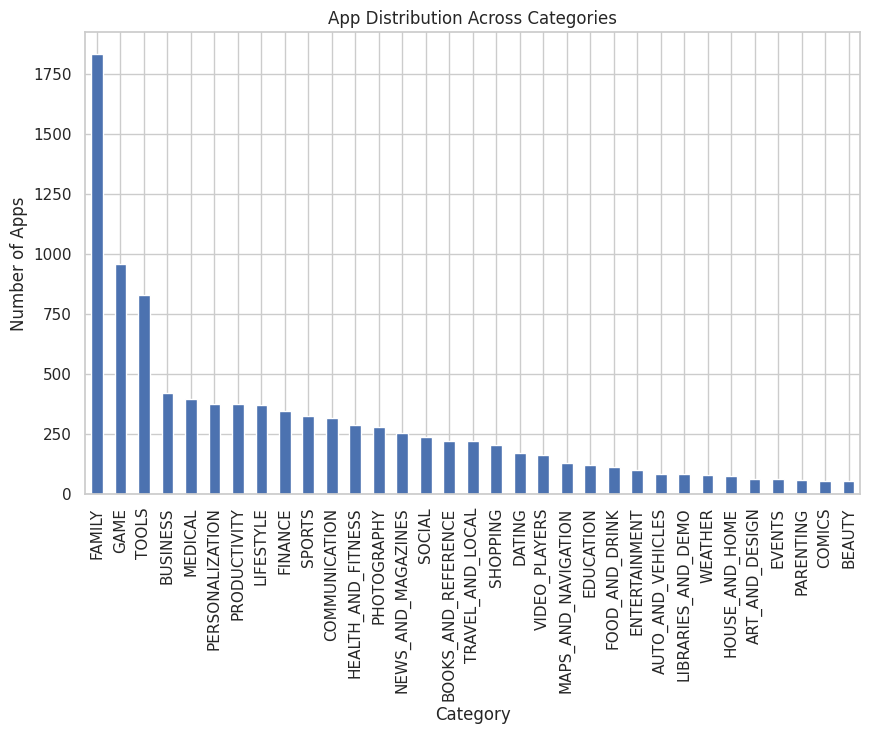

In [51]:
plt.figure(figsize=(10,6))
df['category'].value_counts().plot(kind='bar')
plt.title("App Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.show()


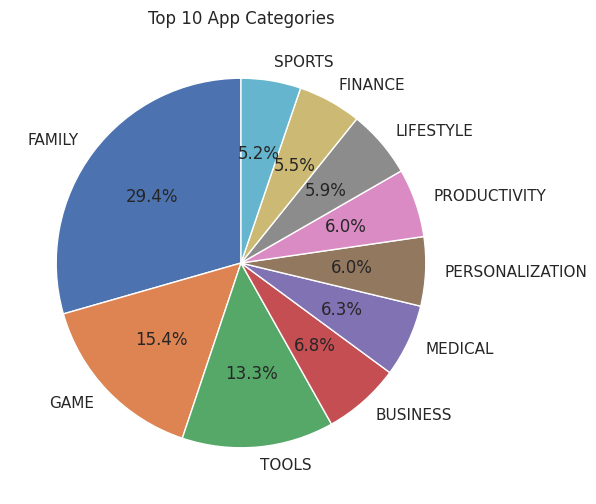

In [52]:
top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(6,6))
plt.pie(
    top_categories.values,
    labels=top_categories.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Top 10 App Categories")
plt.show()
